In [0]:
!pip install split_folders

In [0]:
import split_folders

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import metrics

from sklearn.utils import class_weight
from collections import Counter

import matplotlib.pyplot as plt

import os
from os import listdir
from os.path import isfile, join

In [97]:
cd /content/drive/My Drive/Dataset/gaussian_filtered_images

/content/drive/My Drive/Dataset/gaussian_filtered_images


In [0]:
os.makedirs('output')
os.makedirs('output/train')
os.makedirs('output/val')


In [98]:
!ls output

train  val


In [0]:
base_dir="/content/drive/My Drive/Dataset/gaussian_filtered_images"
split_folders.ratio(base_dir, output='output', seed=1, ratio=(0.8, 0.2))


Copying files: 0 files [00:00, ? files/s]
Copying files: 1 files [00:00,  5.09 files/s]
Copying files: 15 files [00:00,  7.16 files/s]
Copying files: 32 files [00:00, 10.05 files/s]
Copying files: 49 files [00:00, 13.99 files/s]
Copying files: 69 files [00:00, 19.38 files/s]
Copying files: 83 files [00:00, 25.20 files/s]
Copying files: 100 files [00:00, 33.83 files/s]
Copying files: 118 files [00:00, 44.67 files/s]
Copying files: 134 files [00:01, 56.78 files/s]
Copying files: 150 files [00:01, 70.18 files/s]
Copying files: 169 files [00:01, 86.01 files/s]
Copying files: 187 files [00:01, 101.13 files/s]
Copying files: 204 files [00:01, 112.11 files/s]
Copying files: 220 files [00:01, 122.32 files/s]
Copying files: 237 files [00:01, 131.73 files/s]
Copying files: 254 files [00:01, 140.57 files/s]
Copying files: 272 files [00:01, 149.83 files/s]
Copying files: 289 files [00:02, 151.17 files/s]
Copying files: 306 files [00:02, 155.41 files/s]
Copying files: 323 files [00:02, 159.44 file

In [0]:
train_data_loc='output/train/'
test_data_loc='output/val/'

In [100]:
train_it=ImageDataGenerator()
train_data=train_it.flow_from_directory(directory=train_data_loc, target_size=(224,224))
test_it=ImageDataGenerator()
test_data=test_it.flow_from_directory(directory=test_data_loc, target_size=(224,224))

Found 2929 images belonging to 5 classes.
Found 733 images belonging to 5 classes.


In [0]:
import tensorflow as tf


In [0]:
model=tf.keras.models.Sequential([
                                  tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(224,224,3)),
                                  tf.keras.layers.MaxPooling2D(2,2),
                                  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPooling2D(2,2),
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPooling2D(2,2),
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPooling2D(2,2),
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPooling2D(2,2),
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(512,activation='relu'),
                                  tf.keras.layers.Dense(5,activation='softmax')

                                                            
                                  
])

In [103]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 52, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 24, 24, 64)      

In [0]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
#train_data.samples
#train_data.batch_size

In [112]:
history=model.fit(
    train_data,
    steps_per_epoch=train_data.samples//train_data.batch_size,
    validation_data=test_data,
    validation_steps=test_data.samples//test_data.batch_size,
    epochs=20
    
)

Epoch 1/20
91/91 [==============================] - 12s 127ms/step - loss: 3.6753 - accuracy: 0.5923 - val_loss: 0.8842 - val_accuracy: 0.7031
Epoch 2/20
91/91 [==============================] - 11s 124ms/step - loss: 0.8186 - accuracy: 0.6959 - val_loss: 0.8099 - val_accuracy: 0.7131
Epoch 3/20
91/91 [==============================] - 11s 123ms/step - loss: 0.7672 - accuracy: 0.7242 - val_loss: 0.8474 - val_accuracy: 0.7301
Epoch 4/20
91/91 [==============================] - 12s 127ms/step - loss: 0.7320 - accuracy: 0.7384 - val_loss: 0.7796 - val_accuracy: 0.7102
Epoch 5/20
91/91 [==============================] - 12s 127ms/step - loss: 0.7027 - accuracy: 0.7473 - val_loss: 0.7799 - val_accuracy: 0.7330
Epoch 6/20
91/91 [==============================] - 11s 123ms/step - loss: 0.6618 - accuracy: 0.7511 - val_loss: 0.7706 - val_accuracy: 0.7287
Epoch 7/20
91/91 [==============================] - 11s 125ms/step - loss: 0.6338 - accuracy: 0.7684 - val_loss: 0.8000 - val_accuracy: 0.7202

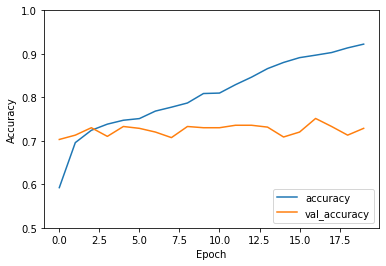

In [113]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower right')

